In [1]:
import numpy as np
import pandas as pd
# import bcolz
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
data_path = 'data/'
seed=1204
# def save_array(fname, arr):
#     """
#     save numpy array to file
#     """
#     c=bcolz.carray(arr, rootdir=fname, mode='w')
#     c.flush()

# def load_array(fname):
#     return bcolz.open(fname)[:]

def get_submission(test,item_cnt_month):
    sub = test.copy()
    sub['item_cnt_month'] = item_cnt_month
    sub.drop(['item_id','shop_id'],axis=1,inplace=True)
    sub.to_csv(data_path + 'submission.csv',index=False)
    return sub

In [2]:
transactions    = pd.read_csv(os.path.join(data_path, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(data_path, 'items.csv'),encoding ='ISO-8859-1')
item_categories = pd.read_csv(os.path.join(data_path, 'item_categories.csv'),encoding ='ISO-8859-1')
shops           = pd.read_csv(os.path.join(data_path, 'shops.csv'),encoding ='ISO-8859-1')
test            = pd.read_csv(os.path.join(data_path, 'test.csv.gz'))

In [3]:
print(transactions.shape)
print(test.shape)

(2935849, 6)
(214200, 3)


In [3]:
transactions['date_format'] = pd.to_datetime(transactions.date,format='%d.%m.%Y')

# Facts:

Data has no missing values

Not all shop_id in train set are used in test set. Test set excludes following shops (not vice versa)
[0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]

Not all item in train set are in test set and vice versa

In test set, a fixed set of items (5100) are used for each shop_id, and each item only appears one per each shop



# EDA

In [12]:
transactions.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_format
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.0,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.0,-1.0,2013-01-05


In [25]:
transactions.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

## Sum of items count per month

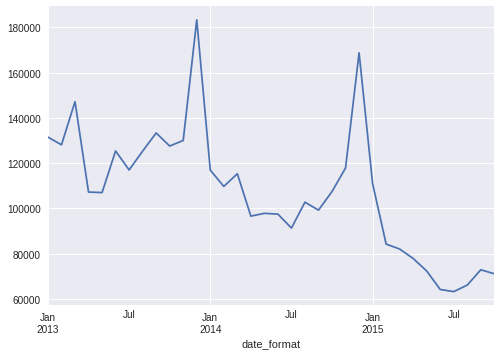

In [14]:
plt.style.use('seaborn')

transactions.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .sum().plot();


## Mean of items count per month

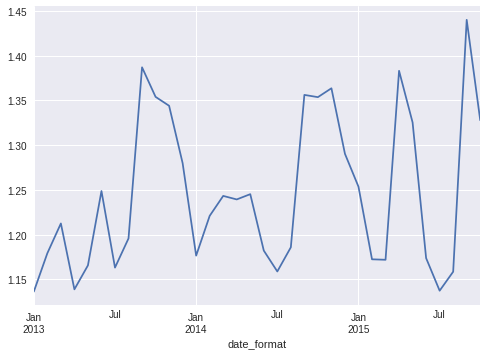

In [15]:
plt.style.use('seaborn')
transactions.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .mean().plot();

## Sum and mean of October items count

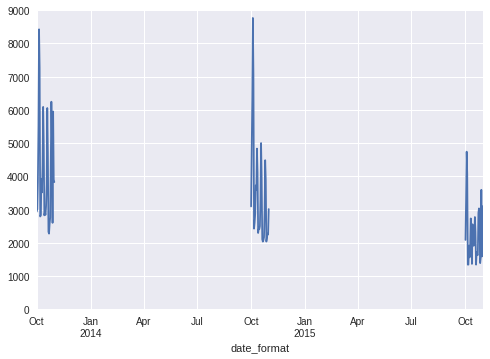

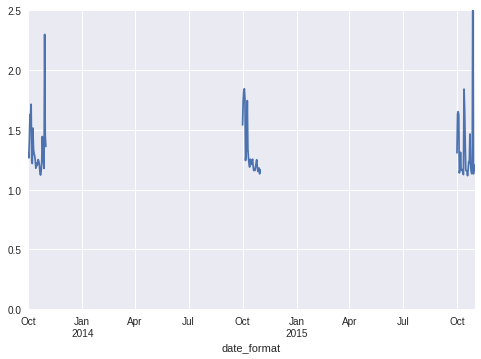

In [33]:
# get oct sales per each day
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

## Sum and mean of November items count

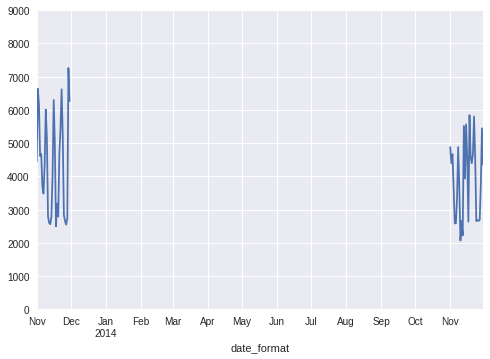

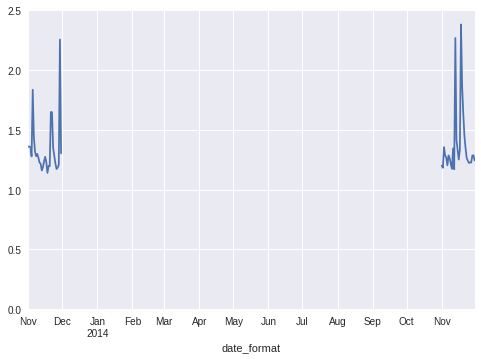

In [36]:
# get nov sales per each day
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

## Sum and mean of December items count

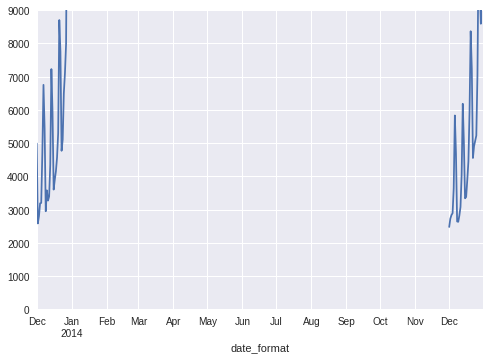

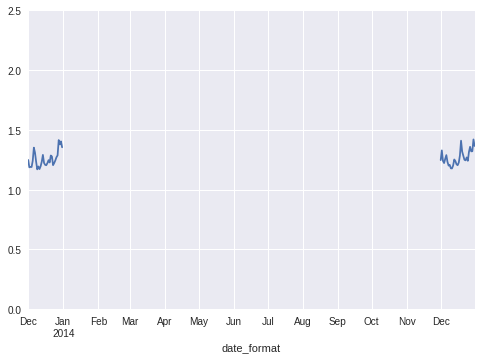

In [35]:
# get dec sales per each day
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()